# Probelm Statement
The objective of this project is to develop a predictive model that accurately classifies breast tumor diagnoses as either benign or malignant based on various features extracted from diagnostic images and patient data. The project aims to identify the best machine learning model and its optimal parameters to achieve high prediction accuracy. The best model is stored as a Pickle file to be used to create a Streamlit web application to view the prediction and probability of the tumour being Malignant or Bening based on the input features.

In [2]:
#Importing Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Data Cleaning 

In [3]:
# Reading the data as a DataFrame

df = pd.read_csv("D:/Data/Dataset/Breast_Cancer/data.csv")

In [4]:
# Cheking for missing values and datatypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
# Dropping irrelevant columns 'Unnamed: 32' and 'id' for model building

df.drop(['Unnamed: 32', 'id'],axis=1, inplace=True)

In [6]:
# Viewing the 'Diagnosis' column which contains labels 'M' for Malignant and 'B' for Benignant Tumors

print(df['diagnosis'])

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object


In [7]:
# Checking for imbalance in the dataset

print(df['diagnosis'].value_counts())

diagnosis
B    357
M    212
Name: count, dtype: int64


**The Dataset is imbalanced**. Bening tumours are more prevalent than Malignant tumours in the dataset. Addressing class imbalance is crucial to ensure that machine learning models trained on imbalanced datasets generalize well and provide accurate predictions for both classes. It introduces Poor Generalization and Evaluation Bias.

In [8]:
# Mapping the 'diagnosis' column to numerical values for binary classification with 'M' as 1 and 'B' as 0

df['diagnosis'] = df['diagnosis'].map({'M':1, 'B':0})

# Model Building

In [9]:
# Creating feature matrix X and dropping the label column 'diagnosis'

X = df.drop(['diagnosis'],axis=1)

In [10]:
#Viewing Training Data - Feature matrix

X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [11]:
# Creating target vector y containing the 'diagnosis' column
y = df['diagnosis']

In [12]:
#Viewing Training Data - Target vector
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [13]:
# Scaling the training data

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [14]:
# 80-20 Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Creating a Parameter Grid for each Model for hyperparameter tuning using GridSearchCV

param_grid_lr = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'random_state': [42]}
param_grid_rf = {'n_estimators': [50, 100, 150], 'max_depth': [3, 5, 7], 'random_state': [42]}
param_grid_knn = {'n_neighbors': [3, 5, 7, 9]}
param_grid_svm_linear = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'random_state': [42]}
param_grid_svm_rbf = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1], 'random_state': [42]}

In [16]:
# Creating a list of models with their respective Parameter grids

models_param_grid = [
    (LogisticRegression(max_iter=1000), param_grid_lr),
    (RandomForestClassifier(), param_grid_rf),
    (KNeighborsClassifier(), param_grid_knn),
    (SVC(kernel='linear', class_weight='balanced'), param_grid_svm_linear),
    (SVC(kernel='rbf', class_weight='balanced'), param_grid_svm_rbf)]

In [17]:
# List of model names

model_names = [
    "Logistic Regression",
    "RandomForest Classifier",
    "KNeighbors Classifier",
    "SVC with linear kernel",
    "SVC with RBF kernel"
]

In [18]:
# Iterate through the param grid of each model and store each model's best parameters for maximum recall score

estimators = {}

for i, _ in enumerate(models_param_grid):
    model = model_names[i]
    estimators[model] = {}
    grid_search = GridSearchCV(models_param_grid[i][0], models_param_grid[i][1], cv=5, scoring='recall')
    grid_search.fit(X_train, y_train)
    estimators[model] = grid_search.best_estimator_

In [19]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score

accuracy_list = []
recall_list = []
precision_list = []
f1_list = []


for key, estimator in estimators.items():
    y_pred = estimator.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_list.append(accuracy)
    recall = recall_score(y_test, y_pred)
    recall_list.append(recall)
    precision = precision_score(y_test, y_pred)
    precision_list.append(precision)
    f1 = f1_score(y_test, y_pred)
    f1_list.append(f1)

    print("\033[1m" + key + "\033[0m")
    print("Accuracy:", accuracy)
    print("Recall:", recall)
    print("Precision:", precision)
    print("F1 Score:", f1)
    print("")

Logistic Regression
Accuracy: 0.9736842105263158
Recall: 0.9767441860465116
Precision: 0.9545454545454546
F1 Score: 0.9655172413793104

RandomForest Classifier
Accuracy: 0.9649122807017544
Recall: 0.9302325581395349
Precision: 0.975609756097561
F1 Score: 0.9523809523809524

KNeighbors Classifier
Accuracy: 0.9473684210526315
Recall: 0.9302325581395349
Precision: 0.9302325581395349
F1 Score: 0.9302325581395349

SVC with linear kernel
Accuracy: 0.956140350877193
Recall: 0.9534883720930233
Precision: 0.9318181818181818
F1 Score: 0.942528735632184

SVC with RBF kernel
Accuracy: 0.9824561403508771
Recall: 0.9534883720930233
Precision: 1.0
F1 Score: 0.9761904761904763



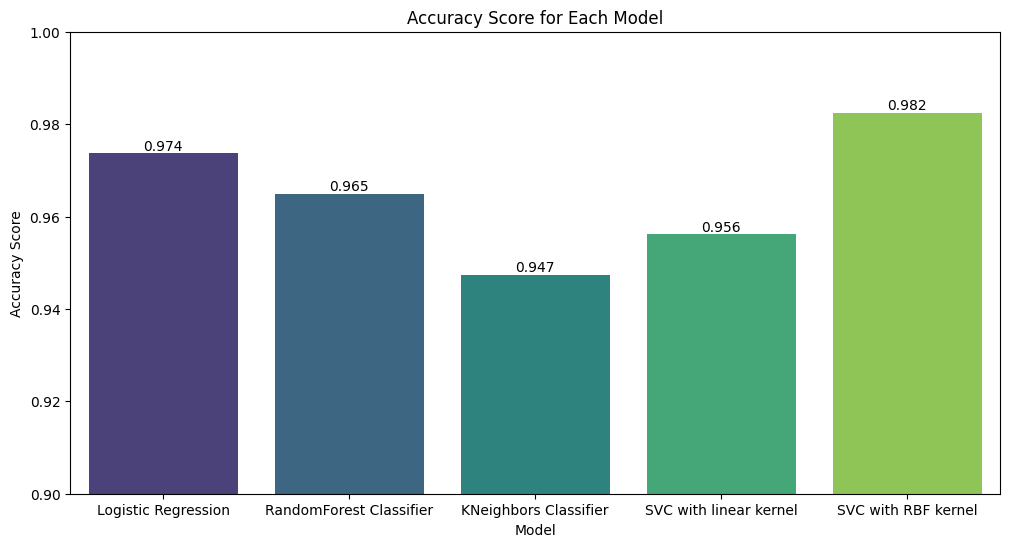

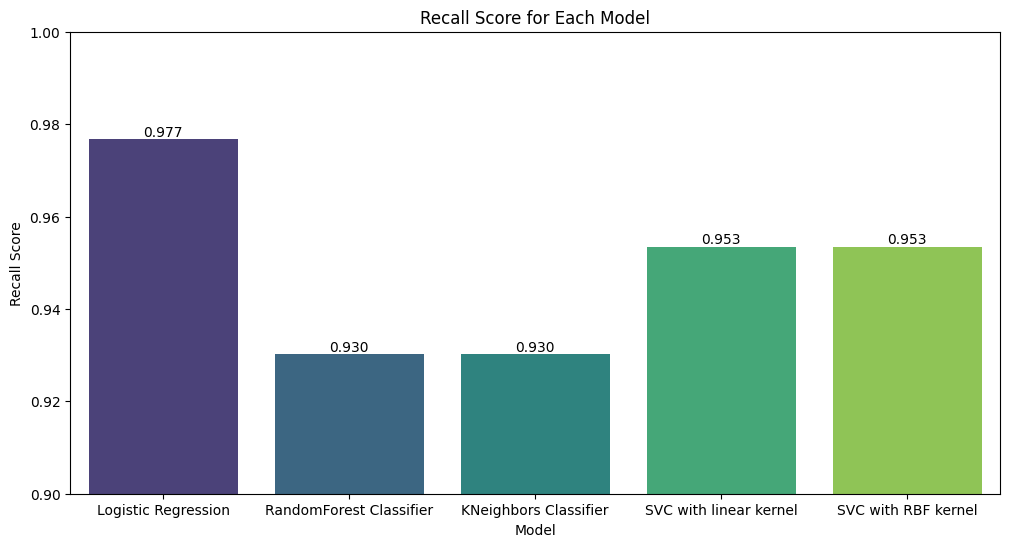

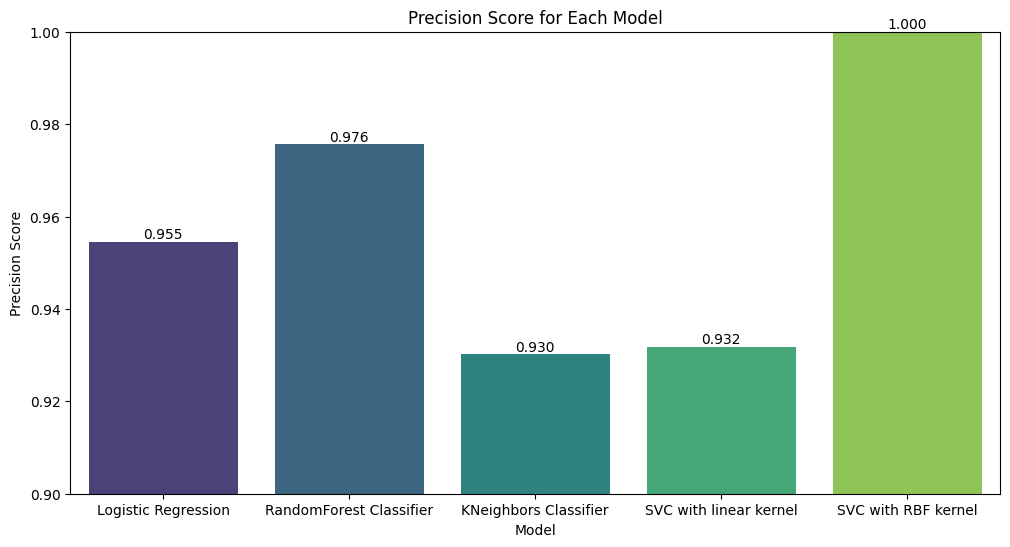

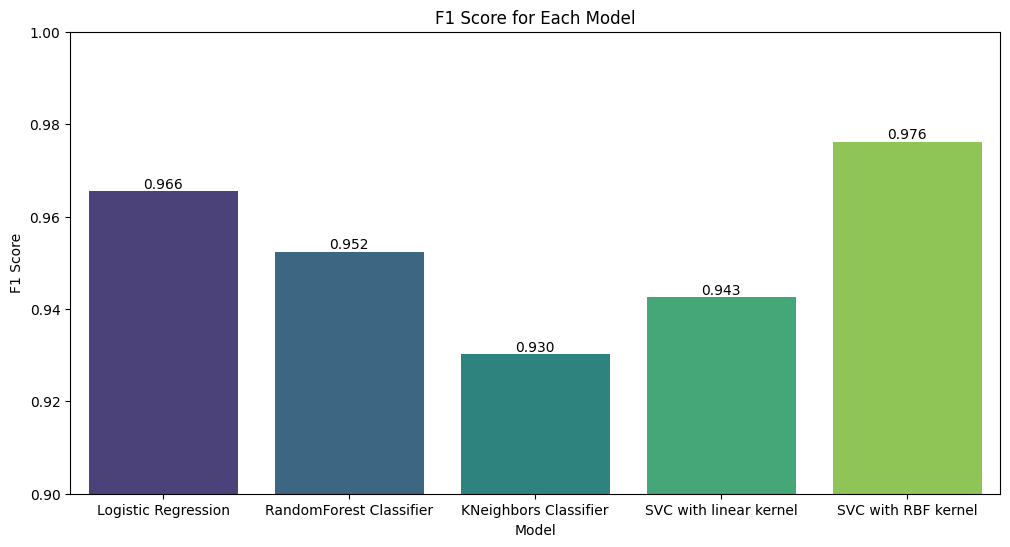

In [20]:
# Plotting each metric for each model

metric_lists = [accuracy_list, recall_list,precision_list, f1_list]
metrics = ['Accuracy', 'Recall', 'Precision', 'F1']
for metric_scores, metric in zip(metric_lists, metrics):
    plt.figure(figsize=(12,6))
    ax = sns.barplot(x=model_names, y=metric_scores,hue=model_names, palette="viridis")
    plt.xlabel('Model')
    plt.ylabel(metric.capitalize() + ' Score')
    plt.title(metric.capitalize() + ' Score for Each Model')
    plt.ylim(0.90, 1)
    for container in ax.containers:
        ax.bar_label(container, fmt='%.3f', label_type='edge')
    plt.show()


# Model Selection

In the context of breast cancer detection, correctly identifying malignant tumors (true positives) is typically more critical than correctly identifying benign tumors (true negatives). Prioritizing recall ensures that the model is sensitive to detecting as many malignant tumors as possible, even if it leads to some false positives.

In case of the imbalance in the dataset with malignant tumors being less prevalent than benign tumors, maximizing recall becomes particularly important. By focusing on recall, the model aims to capture as many instances of malignant tumors as possible, addressing the inherent class imbalance and emphasizing the importance of detecting the more clinically significant condition. 

In [21]:
# Finding the model name with the highest recall and f1 score value

print(f"Model with the highest recall: {model_names[recall_list.index(max(recall_list))]}")
print(f"Model with the highest f1 score: {model_names[f1_list.index(max(f1_list))]}")
print(f"Model with the highest accuracy score: {model_names[accuracy_list.index(max(accuracy_list))]}")

Model with the highest recall: Logistic Regression
Model with the highest f1 score: SVC with RBF kernel
Model with the highest accuracy score: SVC with RBF kernel


Logistic Regression tends to have **Lower Variance**, making it less prone to overfitting, especially with smaller datasets. Logistic Regression outputs probabilities, which can be useful for understanding th **Confidence of Predictions**.

SVM with RBF kernel can effectively handle datasets with a large number of features, making it **Suitable for High-Dimensional data** like gene expression data often seen in cancer research.
SVM with appropriate regularization parameters can be **Robust to Overfitting**, especially with small to medium-sized datasets.

In [22]:
model_to_use = estimators['Logistic Regression']

# Model Serialization with Pickle

In [23]:
import pickle

In [24]:
with open ('model.pkl', 'wb') as f:
    pickle.dump(model_to_use, f)

In [25]:
with open ('scaler.pkl', 'wb') as f:
        pickle.dump(scaler, f)